In [7]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False);

### 차종별 교통량 

In [2]:
df200801 = pd.read_csv('I:\내 드라이브\공모전\새만금 공공데이터 공모전\축제날짜 교통량 3개년\ETC_차종별+교통량+(AVC)_1일_1일_20200801.csv', encoding= 'cp949')
df200801 = df200801[['기준일자','AVC차종구분명','교통량','콘존명']]
df200801[df200801['콘존명'].str.contains('서김제')]

,기준일자,AVC차종구분명,교통량,콘존명
715,20200801,1종,121,서김제IC-동군산IC
716,20200801,2종,2,서김제IC-동군산IC
717,20200801,3종,6,서김제IC-동군산IC
718,20200801,4종,20,서김제IC-동군산IC
719,20200801,5종,24,서김제IC-동군산IC
...,...,...,...,...
99159,20200801,9종,1,동군산IC-서김제IC
99160,20200801,10종,1,동군산IC-서김제IC
99161,20200801,11종,0,동군산IC-서김제IC
99162,20200801,12종,0,동군산IC-서김제IC


In [3]:
combined_df = pd.DataFrame()

for year in range(2020, 2023):
    for day in range(1, 13):

        date_str = f"{year}08{day:02d}"
        file_path = f"I:/내 드라이브/공모전/새만금 공공데이터 공모전/축제날짜 교통량 3개년/ETC_차종별+교통량+(AVC)_1일_1일_{date_str}.csv"
        df = pd.read_csv(file_path, encoding='cp949')
        df = df[['기준일자', 'AVC차종구분명', '교통량', '콘존명']]
        df = df[df['콘존명'].str.contains('서김제')]
        combined_df = pd.concat([combined_df, df])
combined_df['기준일자'] = pd.to_datetime(combined_df['기준일자'], format='%Y%m%d')
combined_df.reset_index(drop=True, inplace=True);

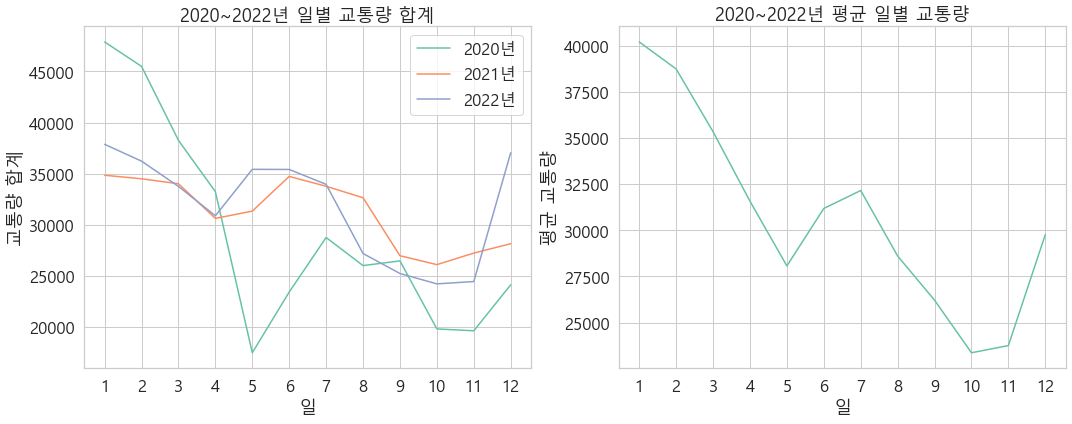

In [5]:
df_2020 = combined_df[combined_df['기준일자'].dt.year == 2020]
df_2021 = combined_df[combined_df['기준일자'].dt.year == 2021]
df_2022 = combined_df[combined_df['기준일자'].dt.year == 2022]

grouped_df_2020 = df_2020.groupby(df_2020['기준일자'].dt.day)['교통량'].sum().reset_index()
grouped_df_2021 = df_2021.groupby(df_2021['기준일자'].dt.day)['교통량'].sum().reset_index()
grouped_df_2022 = df_2022.groupby(df_2022['기준일자'].dt.day)['교통량'].sum().reset_index()

avg_df = pd.concat([grouped_df_2020, grouped_df_2021, grouped_df_2022]).groupby('기준일자')['교통량'].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(grouped_df_2020['기준일자'], grouped_df_2020['교통량'], label='2020년')
plt.plot(grouped_df_2021['기준일자'], grouped_df_2021['교통량'], label='2021년')
plt.plot(grouped_df_2022['기준일자'], grouped_df_2022['교통량'], label='2022년')
plt.xlabel('일')
plt.ylabel('교통량 합계')
plt.xticks(range(1, 13))
plt.title('2020~2022년 일별 교통량 합계')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(avg_df['기준일자'], avg_df['교통량'], label='평균')
plt.xlabel('일')
plt.ylabel('평균 교통량')
plt.title('2020~2022년 평균 일별 교통량')
plt.xticks(range(1, 13))


plt.tight_layout()
plt.show()


In [6]:
df1 = combined_df[combined_df['콘존명'] == '서김제IC-동군산IC'].copy()

df2 = combined_df[combined_df['콘존명'] == '동군산IC-서김제IC'].copy()

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

---

### 정체 구간율

In [8]:
file_pattern = 'I:/내 드라이브/공모전/새만금 공공데이터 공모전/정체구간율/ETC_정체구간율+지표_1달_1개월_{}.csv'
start_year = 201708
end_year = 202208

combined_df = pd.DataFrame()

for year in range(start_year, end_year + 1, 100):
    file_path = file_pattern.format(year)
    df = pd.read_csv(file_path, encoding='cp949')
    combined_df = pd.concat([combined_df, df], ignore_index=True)

filtered_df = combined_df[combined_df['도로명'] == '서해안선']

In [9]:
filtered_df

,집계년월,노선번호,도로명,차로유형구분코드,상세코드명,노선연장길이,정체구간비율,정체구간연장길이,Unnamed: 8
8,201708,150,서해안선,1,일반차로,677.24,2.75,18.62,NaN
59,201808,150,서해안선,1,일반차로,677.24,1.78,12.03,NaN
113,201908,150,서해안선,1,일반차로,677.24,3.54,23.95,NaN
167,202008,150,서해안선,1,일반차로,677.24,3.03,20.54,NaN
222,202108,150,서해안선,1,일반차로,677.24,3.16,21.42,NaN
283,202208,150,서해안선,1,일반차로,678.29,3.83,25.98,NaN


---

### 월별 교통량

In [60]:
merged_df = pd.DataFrame()

for year in range(2015, 2021):
    filename = f"I:\내 드라이브\공모전\새만금 공공데이터 공모전\월별 교통량\월별 차종별 구간 일평균 교통량({year}년).csv"
    df = pd.read_csv(filename, encoding='cp949')
    df['구간'] = df['구간'].str.strip()
    df.columns = df.columns.str.strip()
    df.columns = ['구간', '차종', '1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','연일평균', '전년일평균', '전년대비(%)']
    df = df[df['구간'] == '서김제~부안'].copy() 
    df['연도'] = year
    merged_df = pd.concat([merged_df, df], axis=0)

merged_df = merged_df[['구간','차종','7월','8월','연일평균','전년일평균','전년대비(%)']]
merged_df

In [64]:
data = {
    '구간': [411, 412, 413, 417, 418, 419, 438, 439, 440, 441, 442, 443, 432, 433, 434, 444, 445, 446],
    '차종': ['소형차', '중형차', '대형차', '소형차', '중형차', '대형차', '소형차', '중형차', '대형차', '소형차', '중형차', '대형차', '소형차', '중형차', '대형차', '소형차', '중형차', '대형차'],
    '7월': [17663, 591, 3794, 21271, 505, 4014, 21594, 476, 4202, 21213, 453, 4273, 19747, 454, 4410, 21159, 440, 4125],
    '8월': [24677, 572, 3463, 24700, 497, 3934, 24869, 466, 4180, 23918, 442, 4056, 25418, 445, 4188, 26536, 429, 3773],
    '연일평균': [19571, 586, 3884, 21833, 536, 4294, 22750, 495, 4520, 22364, 472, 4521, 22353, 452, 4614, 22757, 454, 4348],
    '전년일평균': [18620, 602, 3650, 20891, 577, 4028, 21833, 536, 4294, 22823, 482, 4564, 22364, 472, 4521, 22353, 452, 4614],
    '전년대비(%)': [105, 97, 106, 104.51, 92.89, 106.6, 104.2, 92.35, 105.26, 98, 98, 99, 99.95, 95.76, 102.06, 102, 100, 94],
    '연도' : [2015,2015,2015,2016,2016,2016,2017,2017,2017,2018,2018,2018,2019,2019,2019,2020,2020,2020]
}
df = pd.DataFrame(data)
df['7월'] = df['7월'].astype(int)
df['8월'] = df['8월'].astype(int)
df['연일평균'] = df['연일평균'].astype(int)
df['전년일평균'] = df['전년일평균'].astype(int)
df['연도'] = df['연도'].astype(int)


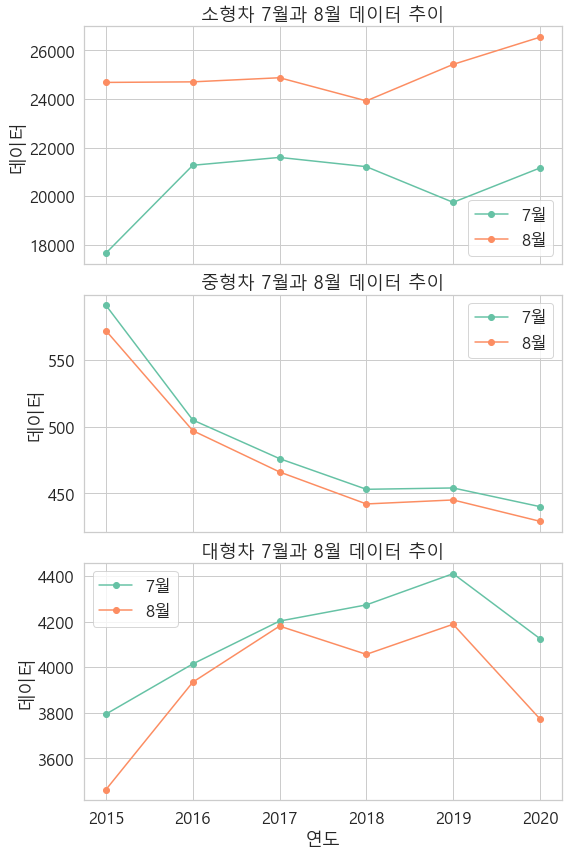

In [72]:
소형차 = df[df['차종'] == '소형차']
중형차 = df[df['차종'] == '중형차']
대형차 = df[df['차종'] == '대형차']

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 12))

axes[0].plot(소형차['연도'], 소형차['7월'], marker='o', label='7월')
axes[0].plot(소형차['연도'], 소형차['8월'], marker='o', label='8월')
axes[0].set_ylabel('데이터')
axes[0].set_title('소형차 7월과 8월 데이터 추이')
axes[0].legend()
axes[1].plot(중형차['연도'], 중형차['7월'], marker='o', label='7월')
axes[1].plot(중형차['연도'], 중형차['8월'], marker='o', label='8월')
axes[1].set_ylabel('데이터')
axes[1].set_title('중형차 7월과 8월 데이터 추이')
axes[1].legend()
axes[2].plot(대형차['연도'], 대형차['7월'], marker='o', label='7월')
axes[2].plot(대형차['연도'], 대형차['8월'], marker='o', label='8월')
axes[2].set_xlabel('연도')
axes[2].set_ylabel('데이터')
axes[2].set_title('대형차 7월과 8월 데이터 추이')
axes[2].legend()
plt.tight_layout()
plt.show()


---

### 시계열 항공편 통계 

In [7]:
df = pd.read_excel('I:\내 드라이브\공모전\새만금 공공데이터 공모전\교통\시계열 항공\시계열통계(2022).xlsx')
df.columns = ['공항','구분','2022년 01월',	'2022년 02월','2022년 03월','2022년 04월','2022년 05월','2022년 06월','2022년 07월','2022년 08월','2022년 09월','2022년 10월','2022년 11월','2022년 12월','누계']
domestic = df[df['구분'] =='국내선']
international = df[df['구분'] =='국제선']
all = df[df['구분']=='전체']

c:\Users\wooyong\anaconda3\envs\kwix\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [46]:
domestic_sorted = domestic.sort_values(by='누계', ascending=False)
domestic_sorted.reset_index(drop = True);

international_sorted = international.sort_values(by='누계', ascending=False)
international_sorted.reset_index(drop = True);

all_sorted = all.sort_values(by='누계', ascending=False)
all_sorted.reset_index(drop = True);

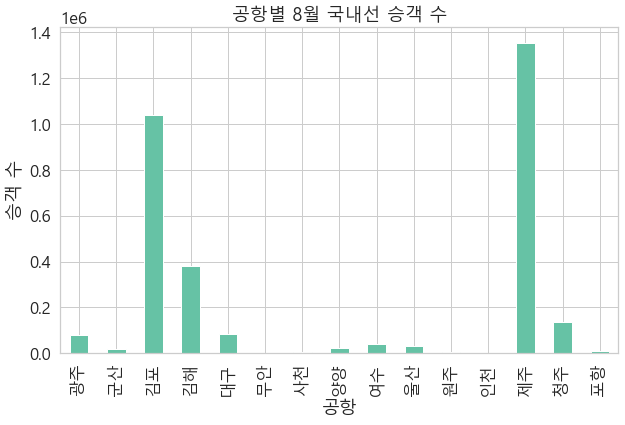

In [45]:
grouped = domestic_sorted.groupby('공항')['2022년 08월'].sum()

grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('공항')
plt.ylabel('승객 수')
plt.title('공항별 8월 국내선 승객 수')

plt.show()

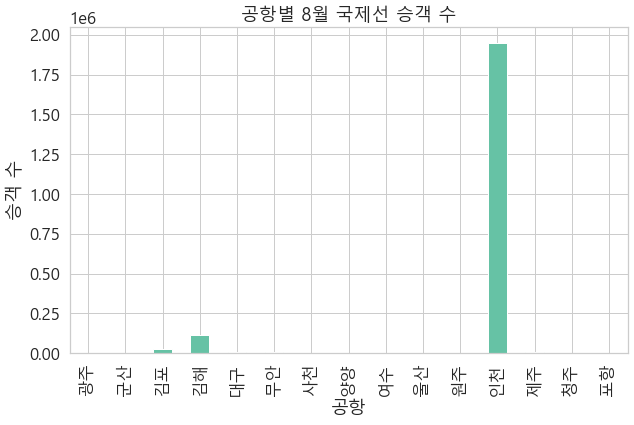

In [49]:
grouped = international_sorted.groupby('공항')['2022년 08월'].sum()

grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('공항')
plt.ylabel('승객 수')
plt.title('공항별 8월 국제선 승객 수')

plt.show()

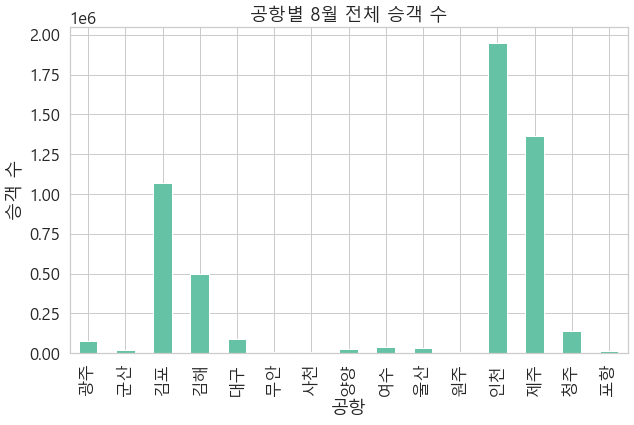

In [52]:
grouped = all_sorted.groupby('공항')['2022년 08월'].sum()

grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('공항')
plt.ylabel('승객 수')
plt.title('공항별 8월 전체 승객 수')

plt.show()

---

In [2]:
from dbfread import DBF
table = DBF('I:\내 드라이브\공모전\새만금 공공데이터 공모전\교통\SHP_DATA\BIKE_NODE.dbf',load = True)
print(table.records[0:2])


[OrderedDict([('BN_ID', '52287504367'), ('BN_CODE', '8'), ('CF_CODE', ''), ('NB_INDEX', ''), ('NB_BN_ID', ''), ('APPROACHES', 2), ('APPR_LID', '52287504579,52287504592'), ('RP_CODE', '6'), ('REMARK', ''), ('X_Coord', 128.680040641), ('Y_Coord', 35.3109287086)]), OrderedDict([('BN_ID', '52287504373'), ('BN_CODE', '3'), ('CF_CODE', ''), ('NB_INDEX', ''), ('NB_BN_ID', ''), ('APPROACHES', 2), ('APPR_LID', '52287504584,52287504585'), ('RP_CODE', ''), ('REMARK', ''), ('X_Coord', 128.685273919), ('Y_Coord', 35.3150486442)])]


In [9]:
df = pd.DataFrame(table.records)

In [10]:
df.to_csv("Export_output.csv")

,Unnamed: 0,BN_ID,BN_CODE,CF_CODE,NB_INDEX,NB_BN_ID,APPROACHES,APPR_LID,RP_CODE,REMARK,X_Coord,Y_Coord
0,0,52287504367,8,NaN,NaN,NaN,2,"52287504579,52287504592",6,NaN,128.680041,35.310929
1,1,52287504373,3,NaN,NaN,NaN,2,"52287504584,52287504585",NaN,NaN,128.685274,35.315049
2,2,52287504374,2,NaN,NaN,NaN,3,"52287504585,52287504586,52287504589",NaN,NaN,128.685257,35.315130
3,3,52287504375,4,1.0,NaN,NaN,2,"52287504586,52287504588",NaN,NaN,128.685301,35.315125
4,4,52287504364,3,NaN,NaN,NaN,2,"52287504577,52287504578",NaN,NaN,128.693454,35.313283
...,...,...,...,...,...,...,...,...,...,...,...,...
23877,23877,57271523865,2,NaN,NaN,NaN,3,"57271524605,57271524607,57271524609",NaN,NaN,127.708495,38.099071
23878,23878,57271523866,2,NaN,NaN,NaN,4,"57271524606,57271524607,57271524608,57271524617",NaN,NaN,127.708314,38.099118
23879,23879,56277523659,3,NaN,NaN,NaN,2,"56277524406,56277524407",NaN,NaN,127.712896,37.921963
23880,23880,56277523660,3,NaN,NaN,NaN,2,"56277524406,56277524423",NaN,NaN,127.712377,37.921963
